In [45]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import norm
from joblib import Parallel, delayed

In [46]:
def check_inside_mandlebrot_bernoullii(i, c):
    z = 0 + 0j
    for i in range(i):
        z = np.square(z) + c
        if np.abs(z) > 2:
            return 0
    return 1


def check_inside_mandlebrot(i, c):
    z = 0 + 0j
    for i in range(i):
        z = np.square(z) + c
        if np.abs(z) > 2:
            return False
    return True


def mandlebrot_area(i, s, sampling_function):
    random_complex_numbers = sampling_function(s)

    in_mandlebrot = 0
 
    for z in random_complex_numbers:
        if check_inside_mandlebrot(i, z):
            in_mandlebrot += 1

    area = in_mandlebrot / s * area_box

    return area


def uniform_samples(n):
    real = np.random.uniform(r_min, r_max, size=n)
    imaginary = np.random.uniform(i_min, i_max, size=n) * 1j
    random_complex_numbers = real + imaginary
    return random_complex_numbers


In [47]:
r_min = -2
r_max = 0.46
i_min = -1.12
i_max = 1.12
area_box = (r_max - r_min) * (i_max - i_min)
default_i = 50

In [48]:
# """
# Bounding the std on the probability that a points falls within the Mandelbrot set.
# """

# # maximum standard deviation on probability
# d = 0.002
# d = 0.01 / area_box

# # relates to 95 % that the standard deviation is indeed below that maximun
# z_value = 1.96

# # keep track of how many samples have been drawn
# k = 0

# # draw 100 random variables
# points = uniform_samples(100)
# values = np.zeros(100)
# for i, p in enumerate(points):
#     xi = check_inside_mandlebrot_bernoullii(default_i, p)
#     values[i] = xi
# k += 100

# # compute the sample mean and sample standard deviation
# sample_mean = values.mean()
# sample_var = np.square(values - sample_mean).sum() / (len(values) - 1)
# sample_std = np.sqrt(sample_var)

# # draw until the sample standard deviation is down to an acceptable level
# while z_value * sample_std / np.sqrt(k) > d:
#     # add an extra random variable
#     point = uniform_samples(1)
#     xi = check_inside_mandlebrot_bernoullii(default_i, point)

#     # recalculate the mean and variance
#     new_sample_mean = sample_mean + (xi - sample_mean) / (k + 1)
#     sample_var = (1 - 1 / k) * sample_var + (k + 1) * (new_sample_mean - sample_mean) ** 2
#     sample_mean = new_sample_mean
#     sample_std = np.sqrt(sample_var)
#     k += 1

# print(f'estimated area is {sample_mean * area_box}')
# print(f'the std on this estimation is lower than {d * area_box} with 95% confidence')
# print(f'{k} samples needed')

In [49]:
"""
Bounding the std on the area of the Mandelbrot set.
"""

n_cores = os.cpu_count()
n_samples = 100

# maximum standard deviation on area
d = 0.02

# relates to 95 % that the standard deviation is indeed below that maximun
z_value = 1.96

# keep track of how many samples have been drawn
k = 0

all_areas = []

# generate 100 values
n_iterations = 100
areas = Parallel(n_jobs=n_cores)(
    delayed(mandlebrot_area)(default_i, n_samples, uniform_samples) for _ in range(n_iterations)
)
all_areas = all_areas + areas

# # compute the sample mean and sample standard deviation
areas = np.array(areas)
sample_mean = areas.mean()
sample_var = np.square(areas - sample_mean).sum() / (len(areas) - 1)
sample_std = np.sqrt(sample_var)

k += n_iterations

# generate more values until the sample standard deviation is down to an acceptable level
while z_value * sample_std / np.sqrt(k) > d:
    
    # determine the area
    n_iterations = 12
    areas = Parallel(n_jobs=n_cores)(
        delayed(mandlebrot_area)(default_i, n_samples, uniform_samples) for _ in range(n_iterations)
    )

    all_areas = all_areas + areas

    # update the std and var
    for area in areas:
        new_sample_mean = sample_mean + (area - sample_mean) / (k + 1)
        sample_var = (1 - 1 / k) * sample_var + (k + 1) * (new_sample_mean - sample_mean) ** 2
        sample_mean = new_sample_mean
        sample_std = np.sqrt(sample_var)
        k += 1

print(f'estimated area is {sample_mean}')
print(f'the std on this estimation is lower than {d} with 95% confidence')
print(f'{k} runs needed')
print(f'that is {k * n_samples} points in total')

estimated area is 1.5961218
the std on this estimation is lower than 0.02 with 95% confidence
640 runs needed
that is 64000 points in total


In [24]:
# """
# Determine a 95% confidence interval of the area of the Mandelbrot set.
# """

# # interval  length
# l = 0.1

# # specify the confidence interval as (1 - alpha) * 100 = ci
# apha = 0.05

# # relates to 99.9% ci as Z_alpha/2 = .327
# z_value = 1.96

# # keep track of how many samples have been drawn
# k = 0


# # draw 100 random variables
# points = uniform_samples(100)
# values = np.zeros(100)
# for i, p in enumerate(points):
#     xi = check_inside_mandlebrot_bernoullii(default_i, p)
#     values[i] = xi
# k += 100

# # compute the sample mean and sample standard deviation
# sample_mean = values.mean()
# sample_var = np.square(values - sample_mean).sum() / (len(values) - 1)
# sample_std = np.sqrt(sample_var)

# # draw until the sample standard deviation is down to an acceptable level
# while 2 * z_value * sample_std / np.sqrt(k) > l:
#     # add an extra random variable
#     point = uniform_samples(1)
#     xi = check_inside_mandlebrot_bernoullii(default_i, point)

#     # recalculate the mean and variance
#     new_sample_mean = sample_mean + (xi - sample_mean) / (k + 1)
#     sample_var = (1 - 1 / k) * sample_var + (k + 1) * (new_sample_mean - sample_mean) ** 2
#     sample_mean = new_sample_mean
#     sample_std = np.sqrt(sample_var)
#     k += 1

# area = sample_mean * area_box

# print(f'estimated area is {area}')
# print(f'we are 95% confident that the real area theta lies between {area - l} and {area + l}')
# print(f'{k} samples needed')

In [51]:
"""
Determine a 95% confidence interval of the area of the Mandelbrot set.
Based on the area calculation.
"""
n_cores = os.cpu_count()
n_samples = 100

# interval  length
l = 0.02

# specify the confidence interval as (1 - alpha) * 100 = ci
apha = 0.05

# relates to 95% ci as Z_alpha/2 = 1.96
z_value = 1.96

# keep track of how many samples have been drawn
k = 0

# keep track of all areas calculated during the process
all_areas = []

# generate 100 values
n_iterations = 100
areas = Parallel(n_jobs=n_cores)(
    delayed(mandlebrot_area)(default_i, n_samples, uniform_samples) for _ in range(n_iterations)
)

all_areas = all_areas + areas

# compute the sample mean and sample standard deviation
areas = np.array(areas)
sample_mean = areas.mean()
sample_var = np.square(areas - sample_mean).sum() / (len(areas) - 1)
sample_std = np.sqrt(sample_var)

k += n_iterations

# draw until the sample standard deviation is down to an acceptable level
while 2 * z_value * sample_std / np.sqrt(k) > l:

    # determine the area
    n_iterations = n_cores
    areas = Parallel(n_jobs=n_cores)(
        delayed(mandlebrot_area)(default_i, n_samples, uniform_samples) for _ in range(n_iterations)
    )
    all_areas = all_areas + areas
    areas = np.array(areas)
    areas_mean = areas.mean()

    # update the std and var
    for area in areas:
        new_sample_mean = sample_mean + (area - sample_mean) / (k + 1)
        sample_var = (1 - 1 / k) * sample_var + (k + 1) * (new_sample_mean - sample_mean) ** 2
        sample_mean = new_sample_mean
        sample_std = np.sqrt(sample_var)
        k += 1

print(f'estimated area is {sample_mean}')
print(f'length of confidence interval is {l}')
print(f'we are 95% confident that the real area theta lies between {sample_mean - l/2} and {sample_mean + l/2}')
print(f'{k} runs needed')
print(f'that is {k * n_samples} points')

estimated area is 1.5931538823529399
length of confidence interval is 0.02
we are 95% confident that the real area theta lies between 1.5831538823529399 and 1.6031538823529399
2380 runs needed
that is 238000 points


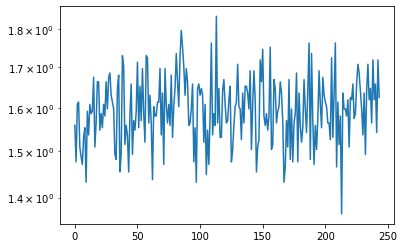

In [44]:
plt.plot(all_areas)
plt.yscale('log')
# plt.xscale('log')

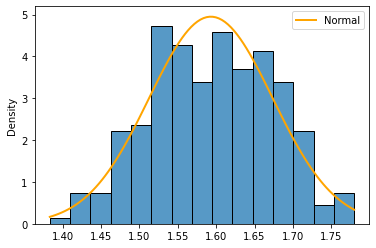

In [26]:
mean_all = np.mean(all_areas)
std_all = np.std(all_areas)

x = np.linspace(min(all_areas), max(all_areas), 100)
y = norm.pdf(x, mean_all, std_all)

plt.plot(x, y, color='orange', linewidth=2, label='Normal')
sns.histplot(all_areas, stat='density', bins=15)
plt.legend()

In [27]:
# """
# Determine a 95% confidence interval of the area of the Mandelbrot set.
# Based on the probability p that a point lies inside the set.
# """

# # interval  length
# l = 0.1

# # specify the confidence interval as (1 - alpha) * 100 = ci
# apha = 0.05

# # relates to 99.9% ci as Z_alpha/2 = .327
# z_value = 1.96

# # keep track of how many samples have been drawn
# k = 0

# # draw 100 random variables
# points = uniform_samples(100)
# values = np.zeros(100)
# for i, p in enumerate(points):
#     xi = check_inside_mandlebrot_bernoullii(default_i, p)
#     values[i] = xi
# k += 100

# # compute the sample mean and sample standard deviation
# sample_mean = values.mean()
# sample_var = np.square(values - sample_mean).sum() / (len(values) - 1)
# sample_std = np.sqrt(sample_var)

# # draw until the sample standard deviation is down to an acceptable level
# while 2 * z_value * sample_std / np.sqrt(k) > l:
#     # add an extra random variable
#     point = uniform_samples(1)
#     xi = check_inside_mandlebrot_bernoullii(default_i, point)

#     # recalculate the mean and variance
#     new_sample_mean = sample_mean + (xi - sample_mean) / (k + 1)
#     sample_var = (1 - 1 / k) * sample_var + (k + 1) * (new_sample_mean - sample_mean) ** 2
#     sample_mean = new_sample_mean
#     sample_std = np.sqrt(sample_var)
#     k += 1

# area = sample_mean * area_box

# print(f'estimated area is {area}')
# print(f'we are 95% confident that the real area theta lies between {area - l} and {area + l}')
# print(f'{k} samples needed')

In [28]:
# std_list = []
# for n in np.linspace(10, 500, 50, dtype=int):

#     n_iterations = n
#     n_cores = os.cpu_count()

#     n_samples = 100  
#     areas = Parallel(n_jobs=n_cores)(
#         delayed(mandlebrot_area)(default_i, n_samples, uniform_samples) for _ in range(n_iterations)
#     )
#     areas = np.array(areas)

#     mean = areas.mean()
#     std = areas.std()

#     std_list.append(std / np.sqrt(n))
# plt.plot(np.linspace(10, 500, 50, dtype=int), std_list)

# # print(f'mean {mean}')
# # print(f'std {std}')

In [29]:
# how many samples - depends on the desired accuracy
# how fast does it converse to that result, std wise
# how many iterations - depends on the ?
# how fast does it converge to that result, mean output wise


In [30]:
# meerdere keren de area samplen vs 1 keer de area samples met hoge n
# de hele vs de halve area samplen 
# ortho LHC checken